# TSF TASK 1
Mohammed Fardeen


In [48]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [49]:
#storing the location of the file in a varible
s = "http://bit.ly/w-data"

In [50]:
#imorting data set
df = pd.read_csv(s,sep = ',')

In [51]:
#checking the data set
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [52]:
#to know the shape(rows and columns)
df.shape

(25, 2)

In [53]:
#to know mean, median, max, min,std
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


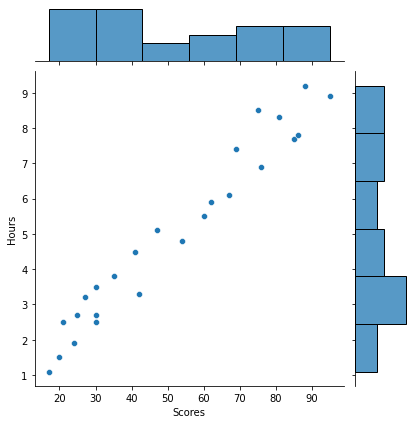

In [54]:
#plotting the data
sns.jointplot(x= 'Scores', y = 'Hours',data = df)

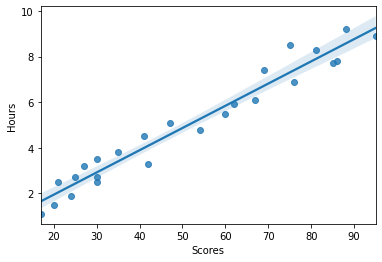

In [55]:
#regression plot for better visualization
sns.regplot(x = 'Scores', y = 'Hours',data = df)

In [56]:
#to know the correlation between the independent and the dependent variable
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [57]:
#separating feature and target variable
x = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [58]:
#test train split
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.2, random_state = 0 )

In [59]:
from sklearn.linear_model import LinearRegression as lg
Regression = lg()
Regression = Regression.fit(x_train,y_train)

In [60]:
#printing the coefficient and intercept
print(Regression.coef_,Regression.intercept_)

[9.91065648] 2.018160041434662


In [61]:
# equation is y= b0*x+b1
#b0 -> coefficient b1->intercept 
#here y is Score
# x is Hours


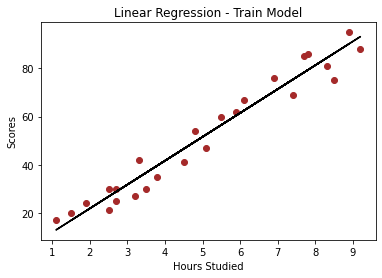

In [62]:
#plotting the regression line for trained data set
line = Regression.coef_*x+Regression.intercept_
plt.title("Linear Regression - Train Model")
plt.xlabel("Hours Studied")
plt.ylabel("Scores")
plt.scatter(x,y,color = 'Brown')
plt.plot(x,line,color = "Black")
plt.show()

In [63]:
#predict value for test dataset
y_pred = Regression.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [65]:
#comparing actual and predicted
pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


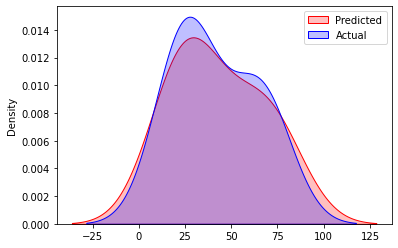

In [66]:
#plotting for actual and predicted
sns.kdeplot(y_pred, color="red", shade=True, label="Predicted")
sns.kdeplot(y_test, color="blue", shade=True, label = "Actual")
plt.legend()

In [68]:
#getting the r^2 value
from sklearn.metrics import r2_score as r2
R2 = r2(y_test,y_pred)
print("R-squared value is ",R2)


R-squared value is  0.9454906892105354


In [69]:
#here R2 value is approximately 0.95 so 95% variuability is explained

In [74]:
#predicting the score for 9.25 hours
hours = np.array(9.25).reshape((-1, 1))
own_pred = Reg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737539


In [75]:
#so we can conclude that if a student studies for 9.25 hours then he/she may score 93.692%